# Plateforme d'Acquisition et de Traitement Automatisé des Textes
### Carnet d'expérimentation
---

## Sujet : Expérience ObsInfo2307 - 8 Observateurs

---

# Imports

In [1]:
cd ../..

/Volumes/Geek/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
pd.set_option('display.precision',2)

# Chargement Données

Mettre la cellule suivante en type code pour charger les données à partir de la googlesheet

In [66]:
# A modifier en fonction de l'emplacement du fichier de données
filename = 'data/tmp/231012-ObsInfo.csv'

In [67]:
df_obsinfo = pd.read_csv(filename)

In [68]:
df_obsinfo

,url_labelizer,title,infox,"lieux, dates et personnes",faits,opinions,subjectif,propos rapporté,sources citées,fausse nouvelle,insinuation,exagération,titre décalé,commentaires,observateur
0,https://app.observatoire.info/labelize?url_h=c...,La relation entre la technologie et la religion,0,1,1,1,1,0,1,0,0,0,0,vraiment indigeste pour commencer !,FB
1,https://app.observatoire.info/labelize?url_h=0...,"Confinement. Les habitants de Brest, Morlaix e...",0,1,1,0,0,0,1,0,0,0,0,NaN,FB
2,https://app.observatoire.info/labelize?url_h=3...,La Chine : Le premier marché mondial de Smartp...,0,1,1,0,0,0,1,0,0,0,0,NaN,FB
3,https://app.observatoire.info/labelize?url_h=4...,"Emmanuel à Olivier : « Tiens bon, on les aura ...",1,1,1,1,1,0,0,1,0,1,0,Article dupliqué (je l'avais manqué),FB
4,https://app.observatoire.info/labelize?url_h=3...,"Selon UBS, les « propriétés d’assurance tant d...",0,1,1,1,1,0,1,0,0,0,0,NaN,FB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,https://app.observatoire.info/labelize?url_h=d...,Loi climat : le gouvernement va exempter Amazo...,0,1,1,0,0,0,0,0,1,1,0,NaN,MC
796,https://app.observatoire.info/labelize?url_h=1...,Le QI peut-il être augmenté par l’éducation ? ...,0,1,1,0,0,0,1,0,0,0,0,NaN,MC
797,https://app.observatoire.info/labelize?url_h=2...,Secte sexuelle : l’ex-star de Smallville Aliso...,0,1,1,0,0,0,1,0,1,0,0,NaN,MC
798,https://app.observatoire.info/labelize?url_h=7...,Sacre de Charles III par SAR le Prince Charles...,0,1,1,1,1,0,0,0,1,0,0,NaN,MC


In [69]:
labels = [
    'infox',
    'lieux, dates et personnes',
    'faits',
    'opinions',
    'subjectif',
    'propos rapporté',
    'sources citées',
    'fausse nouvelle',
    'insinuation',
    'exagération',
    'titre décalé',
]

In [70]:
import numpy as np

In [71]:
def normalize(x):
    if x == '0' or x == 0:
        return 0.0
    elif x== '1' or x== 1:
        return 1.0
    else:
        return np.NaN

In [72]:
for label in labels:
    df_obsinfo[label]=df_obsinfo[label].apply(normalize)

In [73]:
df_obsinfo['url_h'] = df_obsinfo['url_labelizer'].apply(lambda s: s[-40:])

In [74]:
df_obsinfo

,url_labelizer,title,infox,"lieux, dates et personnes",faits,opinions,subjectif,propos rapporté,sources citées,fausse nouvelle,insinuation,exagération,titre décalé,commentaires,observateur,url_h
0,https://app.observatoire.info/labelize?url_h=c...,La relation entre la technologie et la religion,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,vraiment indigeste pour commencer !,FB,c13175936764a345ec21bc398fe750a41496078e
1,https://app.observatoire.info/labelize?url_h=0...,"Confinement. Les habitants de Brest, Morlaix e...",0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,FB,0552561b3c46f64febfbc3a77c301f085a98b966
2,https://app.observatoire.info/labelize?url_h=3...,La Chine : Le premier marché mondial de Smartp...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,FB,361a904687dd4b1abb189717de7341ce162d21c7
3,https://app.observatoire.info/labelize?url_h=4...,"Emmanuel à Olivier : « Tiens bon, on les aura ...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Article dupliqué (je l'avais manqué),FB,433b403d386d5eba5dff7d45044cdb0fe7862972
4,https://app.observatoire.info/labelize?url_h=3...,"Selon UBS, les « propriétés d’assurance tant d...",0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,FB,3494ad0901a73fc6ceb2f74ac4ac1930af42b363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,https://app.observatoire.info/labelize?url_h=d...,Loi climat : le gouvernement va exempter Amazo...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,MC,d04a526d60fa6d67f61c7abcaf45092b8217a24d
796,https://app.observatoire.info/labelize?url_h=1...,Le QI peut-il être augmenté par l’éducation ? ...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,MC,14ed4715949dc7767359674df1a076bb1e0e417b
797,https://app.observatoire.info/labelize?url_h=2...,Secte sexuelle : l’ex-star de Smallville Aliso...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,MC,2841a1db742a25419c20d4a56eb65d8c05d92f65
798,https://app.observatoire.info/labelize?url_h=7...,Sacre de Charles III par SAR le Prince Charles...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,MC,7f8a6372ed4084fc88263c03e3b9186f082e2162


In [75]:
df_obsinfo[labels].isna().sum()

infox                        0
lieux, dates et personnes    0
faits                        0
opinions                     0
subjectif                    0
propos rapporté              0
sources citées               0
fausse nouvelle              0
insinuation                  0
exagération                  0
titre décalé                 0
dtype: int64

### Constats
- 100 articles
- 11 labels
- 8 observateurs
- Tous les labels sont remplis pour tous les articles

# Introduction 
## Annotation moyenne et Accord
Pour chaque label et chaque article on calcule :
- L'**annotation moyenne** = moyenne des annonations de l'ensemble des observateurs
- Le **score d'accord** = `abs(2*moyenne-1)`
    - Vaut 1 si tous les observateurs donnent le meme label
    - Vaut 0 si 50% de 0 et 50% de 1


Ces métriques servent de base à l'étude des résultats suivant 3 axes:
- Analyse par Label
- Analyse par Article
- Analyse par Observateur

In [28]:
df_mean = df_obsinfo.pivot_table(index='title',values=labels,aggfunc='mean')

In [29]:
df_accord = df_mean.apply(lambda x : abs(2*x-1))

In [30]:
df_accord

,exagération,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,titre décalé
title,,,,,,,,,,,
"""On ne peut plus accepter ces mensonges d'État"" Christian Perronne",0.75,1.00,0.50,1.00,0.25,1.00,1.00,0.00,0.75,1.00,0.75
"""Tully"": Charlize Theron super-maman (critique)",1.00,0.75,1.00,1.00,1.00,0.75,1.00,0.50,0.25,0.25,1.00
24 juillet : nouvelles manifestations nationales contre le passe sanitaire,0.00,1.00,0.75,0.50,0.25,1.00,0.75,0.50,0.00,0.75,1.00
"70 000 personnes manifestent à Prague contre le gouvernement tchèque, l’UE et l’OTAN",1.00,1.00,1.00,1.00,0.75,1.00,0.25,0.50,0.75,1.00,1.00
"Affluence en baisse au Carnaval de Nice, sept mois après un attentat très meurtrier",0.75,1.00,1.00,0.75,0.75,1.00,0.00,0.50,0.50,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
"[Entretien exclusif] Helen Joyce : « Aujourd’hui, on demande aux enseignants d’apprendre aux enfants ce que signifie être un garçon ou une fille en les faisant se questionner sur leur identité de genre »",0.25,1.00,0.25,0.25,0.25,0.75,1.00,1.00,0.25,0.50,0.75
"[Tribune] En pleine affaire Ocean Viking, le passeur Cédric Herrou va rencontrer des lycéens !",0.75,1.00,0.25,0.25,0.00,1.00,1.00,0.75,0.50,1.00,0.75
"« Grand remplacement », « Français de papier »… Pécresse manque d’idées et pioche dans les idées de « l’extrême droite »",0.50,1.00,0.75,0.50,0.00,1.00,1.00,0.25,0.75,1.00,1.00


# Analyse par labels

## Sommes des Moyennes

In [31]:
mean_sum = pd.DataFrame(df_mean.sum(),columns=['mean']).sort_values('mean')
mean_sum

,mean
titre décalé,10.50
fausse nouvelle,23.25
propos rapporté,30.62
infox,37.75
exagération,44.88
insinuation,45.38
subjectif,60.25
sources citées,71.50
opinions,72.88
"lieux, dates et personnes",94.00


<Axes: >

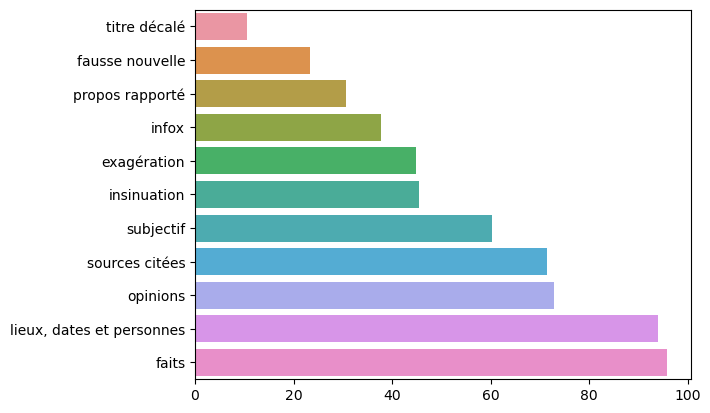

In [32]:
sns.barplot(mean_sum.T,orient="h")

### Constats
- Pas de répartition uniforme par label : Certains sont plus souvent à 0, d'autres plus souvent à 1
    - titre décalé : 10% de 1
    - fausse nouvelle : 23% de 1
    - Lieux dates et personnes : 94% de 1
    - faits : 95 %
### Conclusions
- Le label fait étant à 1 dans 95% des cas n'est peut être pas significatif, peut être faut il l'écarter


## Moyennes des Accords

In [33]:
accord_mean = pd.DataFrame(df_accord.mean(),columns=['sum']).sort_values('sum')
accord_mean

,sum
insinuation,0.51
propos rapporté,0.55
sources citées,0.59
infox,0.62
exagération,0.63
opinions,0.67
fausse nouvelle,0.68
subjectif,0.71
titre décalé,0.80
"lieux, dates et personnes",0.88


<Axes: >

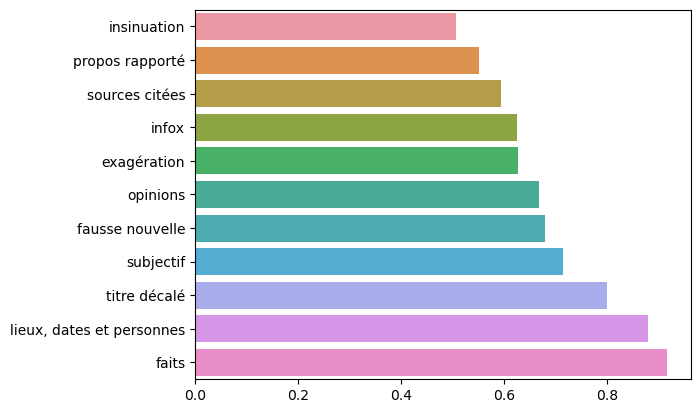

In [34]:
sns.barplot(accord_mean.T,orient="h")

### Constats
- Les observateurs sont plus souvent en accord sur :
    - faits : 0.90
    - titre décalé : 0.82
    - Lieu date personne : 0.81
- Et plus souvent partagés sur :
    - insinuation	0.52
    - sources citées	0.57
    - propos rapporté	0.57

### Conclusions
- 2 observateurs ne vont pas forcément donner la meme valeur à un label donné pour un article donné.
- La moyenne par label est plutot élevée, avec un minimum à 0.51 (7/9 : 0.56)


## Comptage accords par nombre de voix pour atteindre la majorité


In [35]:
print("Scores d'Accord pour 9 observateurs")
for i in range(5,9):
    print(f'{i}/8 = {(i/8-0.5)*2:.2f}')

Scores d'Accord pour 9 observateurs
5/8 = 0.25
6/8 = 0.50
7/8 = 0.75
8/8 = 1.00


In [36]:
df_details = pd.DataFrame()
for i in range(5,9):
    threshold = (i/8-0.5)*2
    df_details[i] = pd.DataFrame(df_accord.apply(lambda x: x==threshold).sum(),columns=['count']).sort_values('count')

In [37]:
df_details.sort_values(5,ascending=False)

,5,6,7,8
insinuation,26,22,23,16
propos rapporté,23,39,16,18
sources citées,22,19,22,28
infox,21,20,19,33
subjectif,14,13,22,45
fausse nouvelle,13,20,21,39
opinions,12,18,21,39
exagération,10,14,23,36
titre décalé,4,12,28,52
"lieux, dates et personnes",3,8,19,69


In [38]:
df_details['low'] = df_details[5]+df_details[6]
df_details['high'] = df_details[7]+df_details[8]

In [39]:
df_details.sort_values('high',ascending=False)

,5,6,7,8,low,high
faits,1,2,18,77,3,95
"lieux, dates et personnes",3,8,19,69,11,88
titre décalé,4,12,28,52,16,80
subjectif,14,13,22,45,27,67
opinions,12,18,21,39,30,60
fausse nouvelle,13,20,21,39,33,60
exagération,10,14,23,36,24,59
infox,21,20,19,33,41,52
sources citées,22,19,22,28,41,50
insinuation,26,22,23,16,48,39


### Constats
#### Unanimité
- Il n'y a unanimité sur aucun label
- Le meilleur score d'unanimité est pour **faits** avec 73%
- Les moins bon scores sont insinuation et propos raportés
#### Accord relatif = high = 7/9 + 8/9 + 9/9
- Bon scores high pour faits et lieux dates personnes
- infox : Seulement 59% de high : la notion n'est pas clairement définie
#### Division = low = 5/9 + 6/9
- Les labels qui divisent le plus sont insinuation (37%) et sources citées (36%)
### Conclusion
- Biais de compréhension possible
    - Pour le label source citées par exemple

## Polarité des accords

In [40]:
df_details['moyenne']=df_mean.sum()
df_details['accord']=df_accord.sum()
df_details['label']=df_details.index

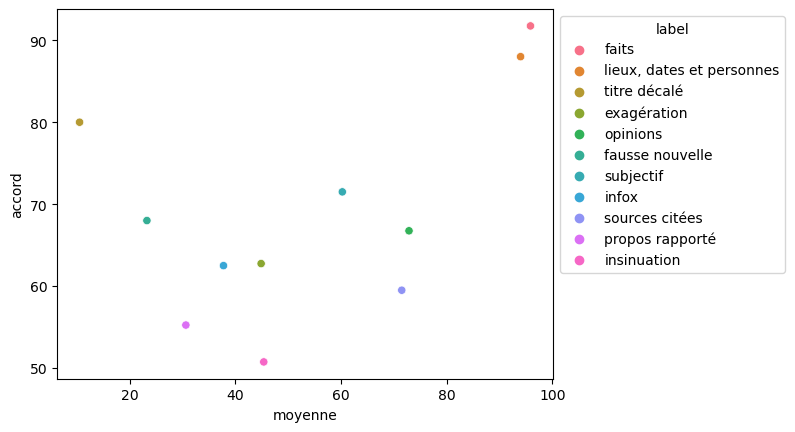

In [41]:
ax = sns.scatterplot(df_details,x='moyenne',y='accord',hue='label')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Constats
La courbe a une forme de U :
- L'accord est plus élevé pour les moyennes extrèmes
- L'accord est plus bas pour les moyennes "moyennes"
### Conclusions
Les observateurs sont plus souvents en accord sur les labels qui ont plus souvent les meme valeurs

# Analyse par articles

## Moyenne des accords des 11 labels

In [42]:
df_accord_articles=pd.DataFrame(df_accord.T.mean().sort_values(),columns=['accord_mean'])

In [43]:
df_accord_articles.sort_values('accord_mean')

,accord_mean
title,
L’ouverture des sceaux de l’Apocalypse,0.39
Un couple loge une famille de migrants : 36.000 € de dégâts,0.41
Ursula von der Leyen menace les Italiens à la veille des élections,0.43
Loi climat : le gouvernement va exempter Amazon et le e-commerce des fortes contraintes de la future loi,0.48
"Propagande : Mauricette revient jouer la pièce « On vaccine Mamie », mais les Français désapprouvent",0.50
...,...
Suisse : une rentrée politique sous le signe du viol,0.91
Un colonel de gendarmerie à la tête de la SPA pour ramener la paix,0.91
"Beyrouth: jusqu’à 300 000 personnes sans domicile après les explosions, la moitié de la ville touchée",0.93


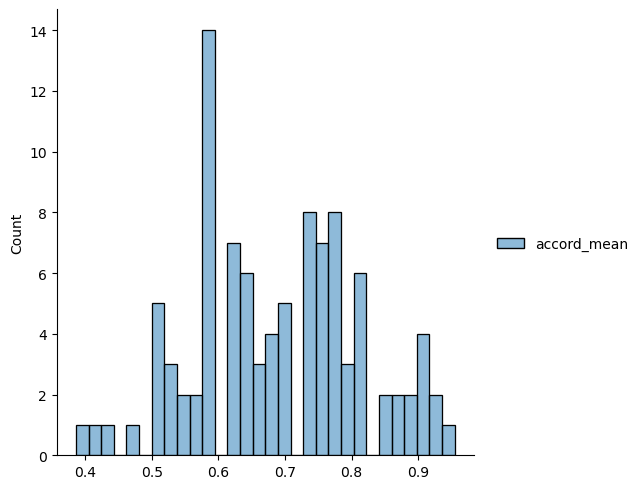

In [44]:
sns.displot(df_accord_articles,bins=30)

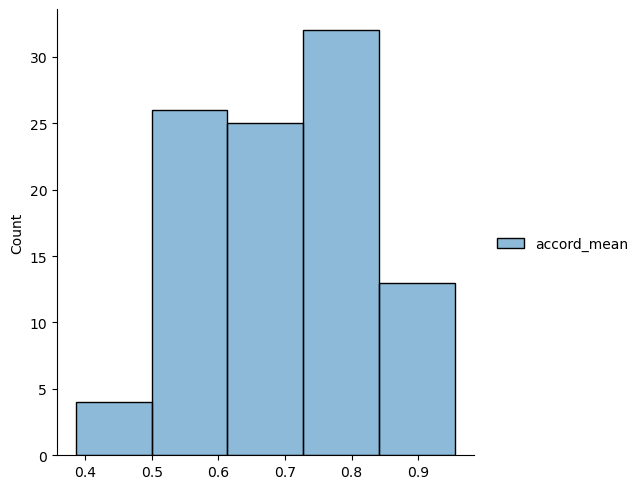

In [45]:
sns.displot(df_accord_articles,bins=5)

### Constats
- Distribution clairement décalée vers l'accord
- La plus petite moyenne est à 0.39, le minimum théorique est de 0.11
- Le meilleur accord est à 0.93 pour trois articles
### Conclusions
- Les observateurs ne sont pas en désacord sur tous les labels en meme temps

## Sous-ensemble de labels
On écarte volontairement les labels :
- Non significatifs : Trop souvent la meme valeur
- Observation biaisée : Le brief de lbelisation n'était pas clair

In [46]:
selected_labels = ['infox','opinions','subjectif','exagération','insinuation']

In [47]:
df_accord_articles = pd.DataFrame(df_accord[selected_labels].T.mean().sort_values(),columns=['accord'])

In [48]:
df_accord_articles.sort_values('accord').head(10)

,accord
title,
Les projets de démantèlement de la Russie,0.20
Ursula von der Leyen menace les Italiens à la veille des élections,0.20
Loi climat : le gouvernement va exempter Amazon et le e-commerce des fortes contraintes de la future loi,0.25
Mortalité du bétail et antenne-relais : une décision de justice inespérée,0.25
"Covid-19 : Spike, ARN et ""vaccins""… Et si on lançait les études préalables ?",0.25
L’avortement médicalement assisté ne sauve pas la vie des femmes,0.30
La Grèce ne veut plus être le mouton noir de l’Europe,0.30
Vaccin anti-Covid : la descente aux enfers d’Eloïse,0.30
Un médecin de l’armée américaine révèle que les médecins ont reçu l’ordre de ne pas signaler les effets indésirables liés aux « vaccins » anti-Covid,0.30


In [49]:
df_accord_articles.sort_values('accord').tail(10)

,accord
title,
"Point de situation au 06/12/21 au Centre hospitalier de Haguenau : sur 8 patients en réanimation, 7 sont vaccinés !",0.90
Bac 2019: appel à poursuivre la grève jusqu'au brevet,0.90
Soyez vous-même une Fallaci !,0.90
Un colonel de gendarmerie à la tête de la SPA pour ramener la paix,0.90
"Beyrouth: jusqu’à 300 000 personnes sans domicile après les explosions, la moitié de la ville touchée",0.95
Voir les corrompus bien en face,0.95
Essonne : Les voleurs tombent sur des membres du GIGN qui sortaient de leur entraînement,0.95
"Bilar : « Nous approchons bien de l’échec et mat, si rien ne vient les en empêcher »",0.95
Israël bombarde des cibles iraniennes et du Hezbollah en Syrie,1.00


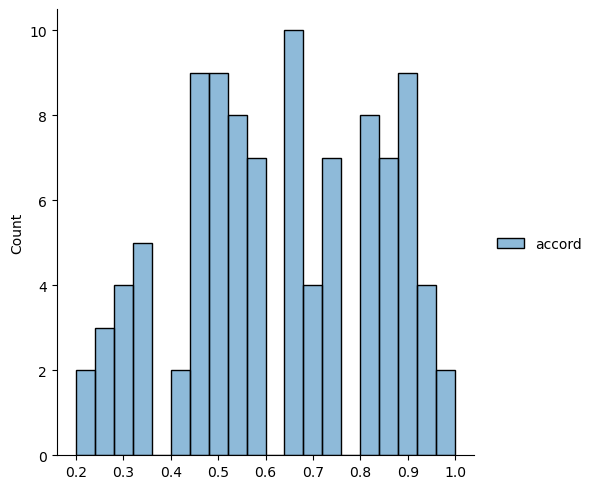

In [50]:
sns.displot(df_accord_articles,bins=20)

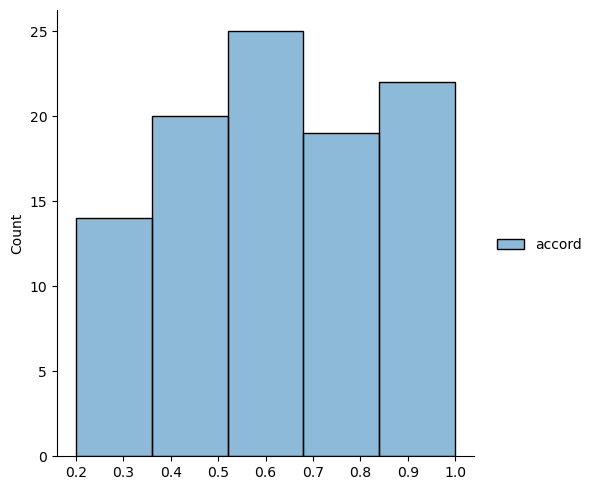

In [51]:
sns.displot(df_accord_articles,bins=5)

### Constats
- La plus petite moyenne est cette fois ci à 0.15, suivi de trois articles à 0.24
- Les données sont mieux distribuées que précédement, avec toujours un décalage vers l'accord
- Deux articles en accord parfait à 1, suivis de 4 articles à 0.95
### Conclusions
- Plus de valeurs extrèmes, la réduction du nombre de labels fait apparaitre plus de volatilité dans l'accord entre observateurs

# Analyse par observateurs
On compte pour chaque label, le nombre d'article à 1 pour chaque observateur

In [52]:
df_obs = df_obsinfo.pivot_table(index='observateur',aggfunc='sum')[labels]

In [53]:
df_obs = df_obs.sort_values('infox')

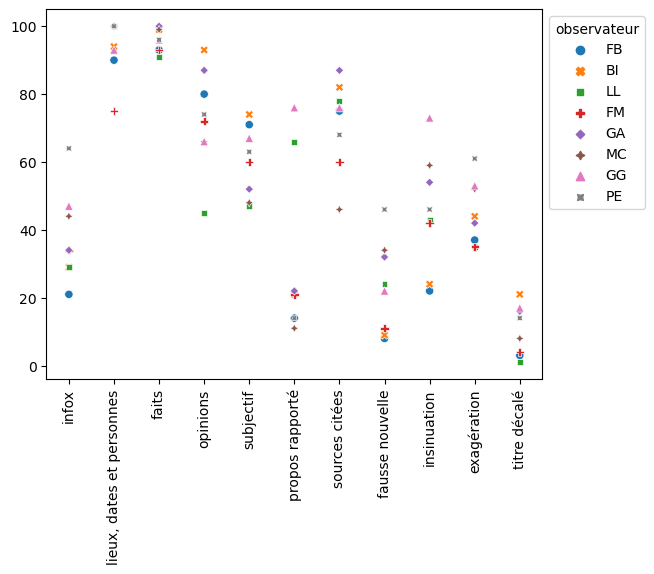

In [54]:
ax = sns.scatterplot(df_obs.T)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=90)

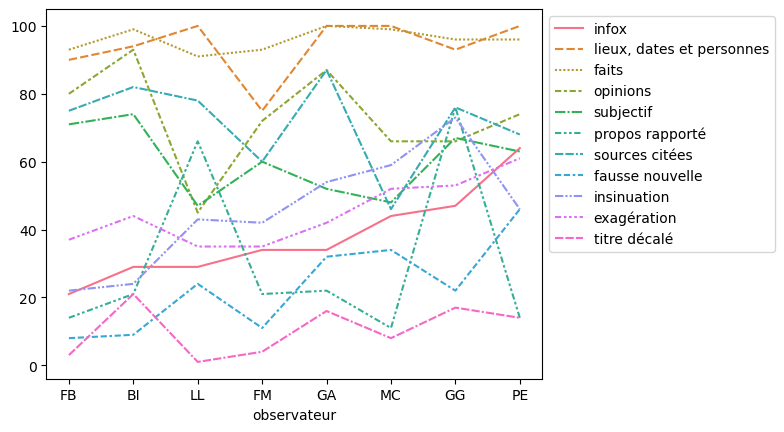

In [55]:
ax = sns.lineplot(df_obs)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [56]:
df_stat = (df_obs.describe().T).drop(columns=['count','25%','50%','75%'])

In [57]:
df_stat

,mean,std,min,max
infox,37.75,13.50,21.0,64.0
"lieux, dates et personnes",94.00,8.64,75.0,100.0
faits,95.88,3.31,91.0,100.0
opinions,72.88,14.78,45.0,93.0
subjectif,60.25,10.36,47.0,74.0
propos rapporté,30.62,25.38,11.0,76.0
sources citées,71.50,13.20,46.0,87.0
fausse nouvelle,23.25,13.61,8.0,46.0
insinuation,45.38,17.09,22.0,73.0
exagération,44.88,9.58,35.0,61.0


## Ecarts par label

In [58]:
df_stat['spread']=df_stat['max']-df_stat['min']

In [59]:
df_stat.sort_values('spread')

,mean,std,min,max,spread
faits,95.88,3.31,91.0,100.0,9.0
titre décalé,10.50,7.46,1.0,21.0,20.0
"lieux, dates et personnes",94.00,8.64,75.0,100.0,25.0
exagération,44.88,9.58,35.0,61.0,26.0
subjectif,60.25,10.36,47.0,74.0,27.0
fausse nouvelle,23.25,13.61,8.0,46.0,38.0
sources citées,71.50,13.20,46.0,87.0,41.0
infox,37.75,13.50,21.0,64.0,43.0
opinions,72.88,14.78,45.0,93.0,48.0
insinuation,45.38,17.09,22.0,73.0,51.0


<Axes: >

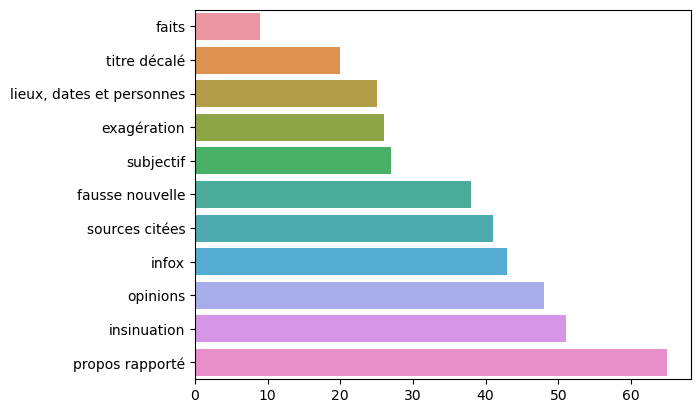

In [60]:
sns.barplot(pd.DataFrame(df_stat['spread']).sort_values('spread').T,orient='h')

### Constats
- Les écarts entre min et max peuvent aller jusqu'à 65%
### Conclusions
- Les observateurs ne labelisent pas de la meme manière pour la plupart des labels
- Explications possibles à explorer :
    - Sens différent apporté aux labels
    - Subjectivité des labels
    - Différence d'appréciation pour un texte complet, plutot qu'on paragraphe

<Axes: xlabel='observateur'>

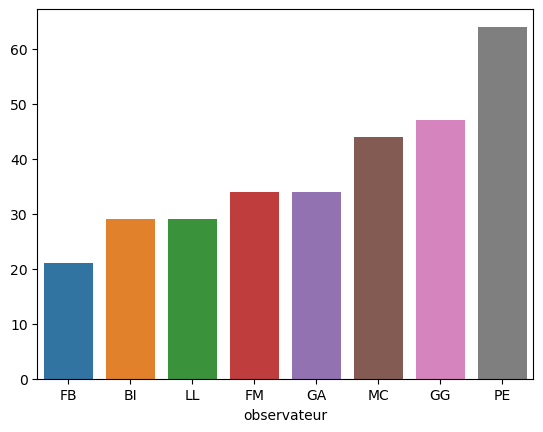

In [61]:
label = 'infox'
sns.barplot(pd.DataFrame(df_obs[label]).sort_values(label).T)

<Axes: xlabel='observateur'>

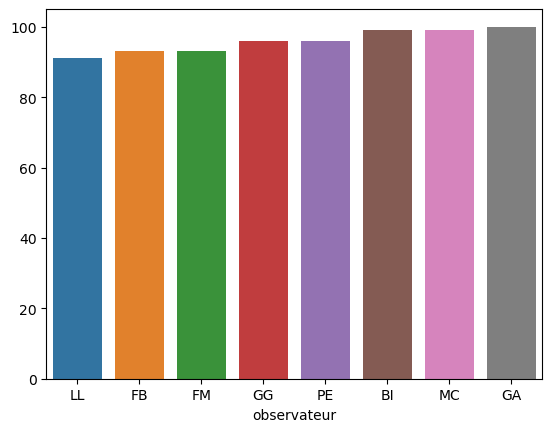

In [62]:
label = 'faits'
sns.barplot(pd.DataFrame(df_obs[label]).sort_values(label).T)

<Axes: xlabel='observateur'>

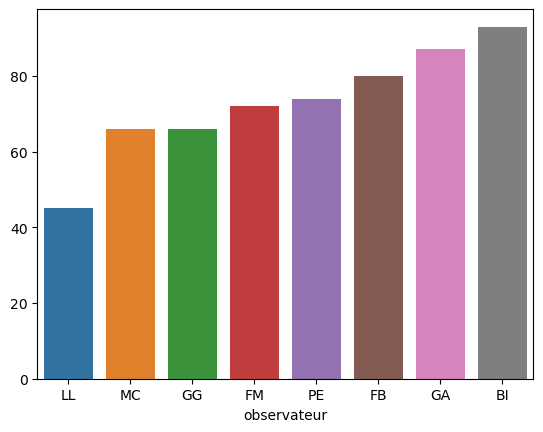

In [63]:
label = 'opinions'
sns.barplot(pd.DataFrame(df_obs[label]).sort_values(label).T)

<Axes: xlabel='observateur'>

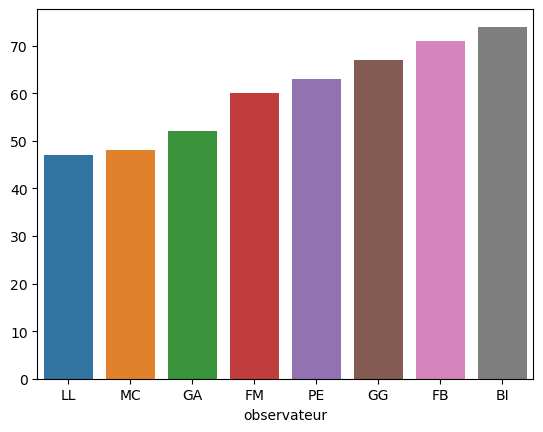

In [64]:
label = 'subjectif'
sns.barplot(pd.DataFrame(df_obs[label]).sort_values(label).T)

<Axes: xlabel='observateur'>

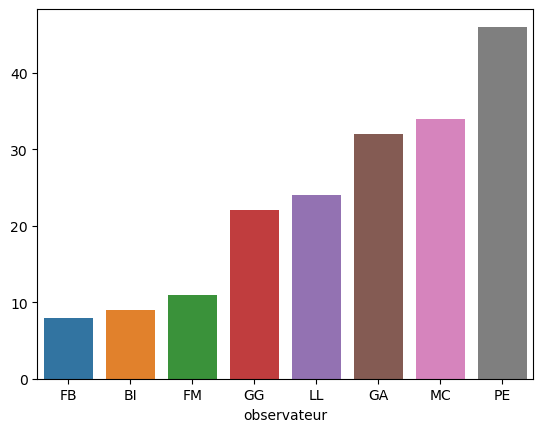

In [65]:
label = 'fausse nouvelle'
sns.barplot(pd.DataFrame(df_obs[label]).sort_values(label).T)

# Conclusions
## Résumé des constats

## Enseignements et résultats de l'expérience

## Prochaines étapes